In [1]:
import cv2
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cv2_imshow(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

# Zadanie 3. Preprocessing

Załóż, że docelowym zadaniem jest odczytanie tekstu przez model CV. Twoim zadaniem jest przygotowanie obrazu do tego kroku.

1. Wczytaj obraz z pliku.
2. Korzystając z poznanych narzędzi, wybierz stosowne, aby docelowy obraz był czarnym tekstem na białym tle, bez szumów.
- filtry splotowe;
- wyrównanie histogramu;
- progowanie;
- operacje morfologiczne;

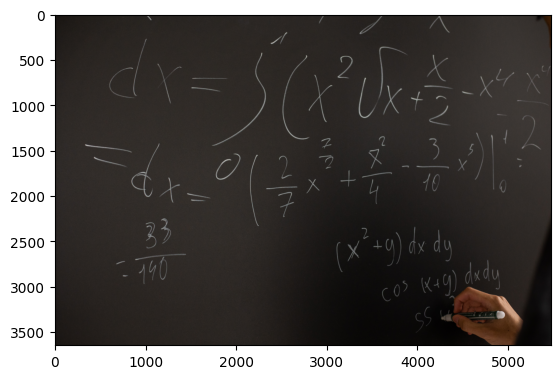

In [4]:
# wczytanie obrazu
img = cv2.imread('pexels-photo-6238297.jpeg')
# wyświetlenie obrazu
cv2_imshow(img)

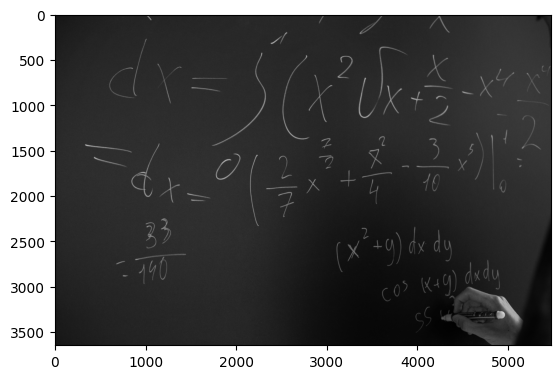

In [5]:
# zamiana na skalę szarości
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [6]:
gray

array([[23, 27, 23, ..., 49, 49, 44],
       [16, 19, 28, ..., 41, 45, 57],
       [21, 19, 25, ..., 43, 37, 39],
       ...,
       [22, 25, 25, ..., 19, 20, 28],
       [25, 23, 19, ..., 22, 16, 27],
       [21, 25, 20, ..., 25, 24, 20]], dtype=uint8)

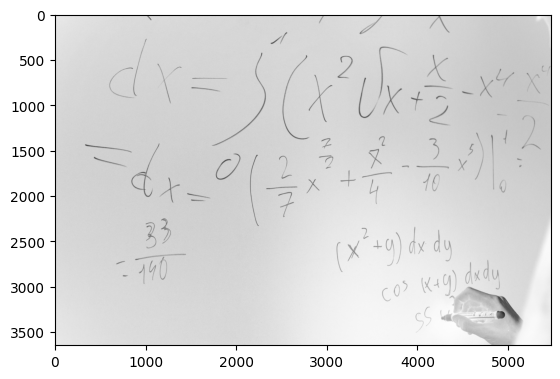

In [7]:
gray_reversed = (255-gray)
cv2_imshow(gray_reversed)

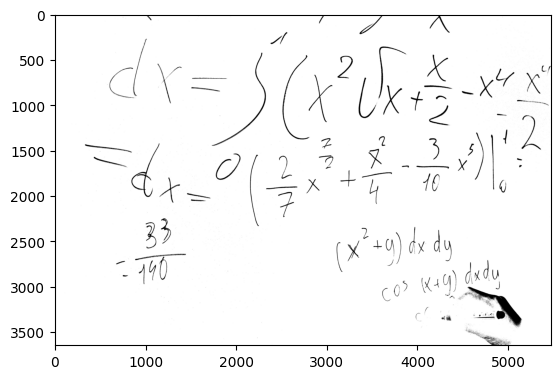

In [16]:
ret,thresh1 = cv2.threshold(gray_reversed,180,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)

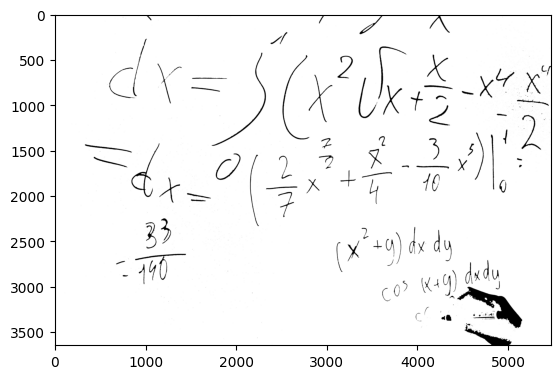

In [29]:
operation='Opening'
struct_el='MORPH_RECT'
size = 9
def opening(img, kernel):
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

def closing(img, kernel):
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
operation_dict = {'Erosion': cv2.erode,'Dilation': cv2.dilate,
                 'Opening': opening, 'Closing': closing}
struct_el_dict = {'MORPH_RECT': cv2.getStructuringElement(cv2.MORPH_RECT,(size, size)),
                  'MORPH_ELLIPSE': cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(size, size)),
                  'MORPH_CROSS': cv2.getStructuringElement(cv2.MORPH_CROSS,(size, size))}
result = operation_dict[operation](thresh1, struct_el_dict[struct_el])
cv2_imshow(result)

## Sposób 1 - thresholding

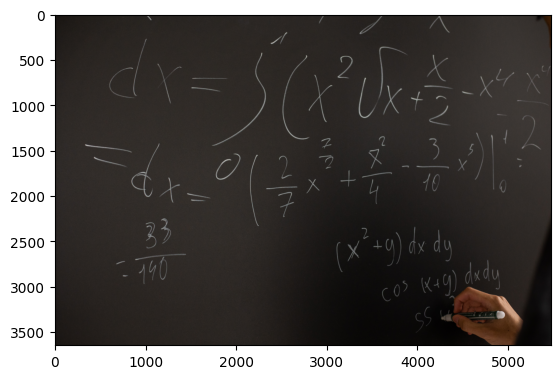

In [3]:
# wczytanie obrazu
img = cv2.imread('pexels-photo-6238297.jpeg')
cv2_imshow(img)

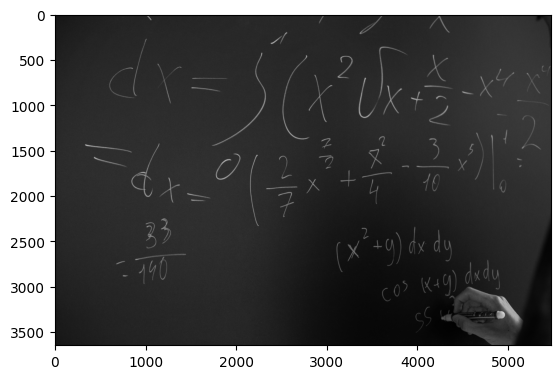

In [4]:
# zamiana na skalę szarości
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

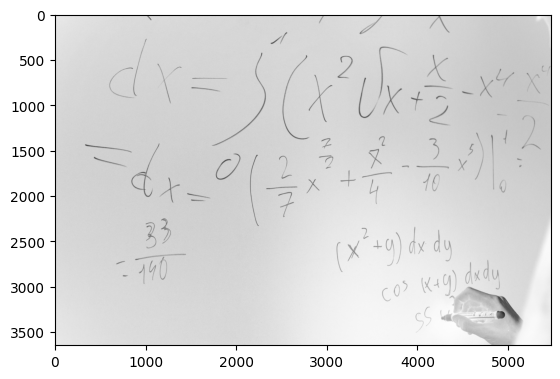

In [5]:
# odwrócenie kolorów
gray_reversed = (255-gray)
cv2_imshow(gray_reversed)

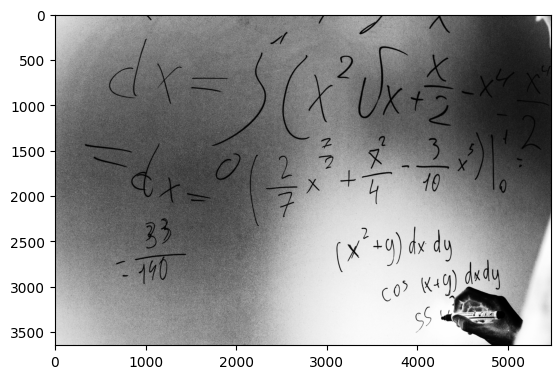

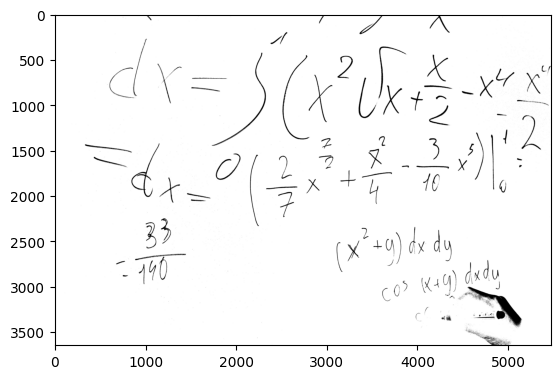

In [6]:
# wersja 1 - wyrównanie histogramu + tresholding
equ = cv2.equalizeHist(gray_reversed)
cv2_imshow(equ)

ret, thresh_1 = cv2.threshold(equ, 5, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh_1)

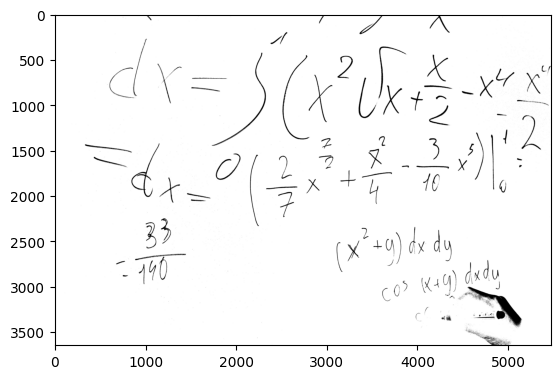

In [7]:
# wersja 2 - tresholding
ret, thresh_1 = cv2.threshold(gray_reversed, 180, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh_1)

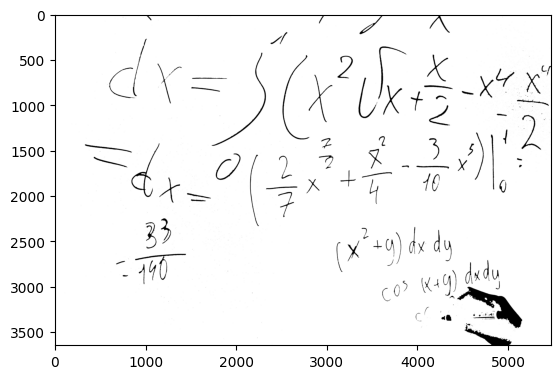

In [8]:
# operacja morfologiczna - otwarcie
morph = cv2.morphologyEx(thresh_1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT,(9, 9)))
cv2_imshow(morph)

## Sposób 2 - użycie filtrów splotowych

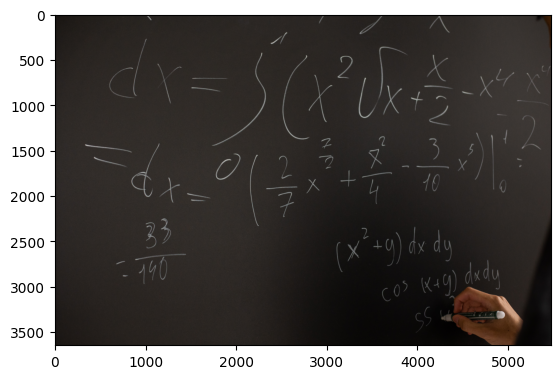

In [9]:
# wczytanie obrazu
img = cv2.imread('pexels-photo-6238297.jpeg')
cv2_imshow(img)

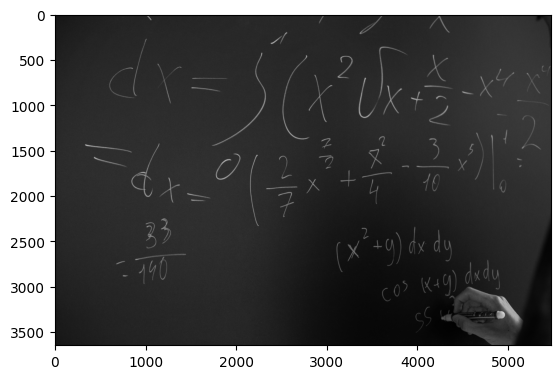

In [10]:
# zamiana na skalę szarości
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

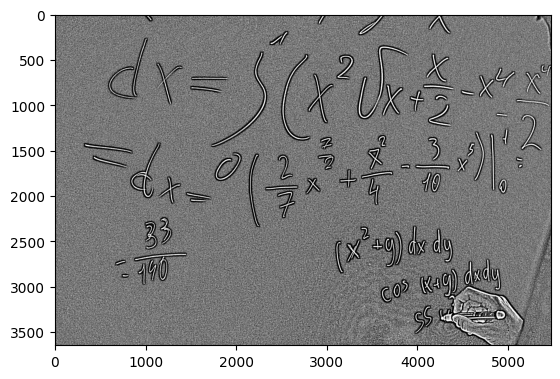

In [11]:
def apply_filter(source, kernel):
    new_image = cv2.filter2D(source, -1, kernel)
    return new_image

kernel_size = 35
edge_det = np.ones((kernel_size,kernel_size))
edge_det = (-1) * edge_det
edge_det[kernel_size//2, kernel_size//2] = kernel_size*kernel_size - 1

res = apply_filter(gray, edge_det)

# res = (255-res)
cv2_imshow(res)

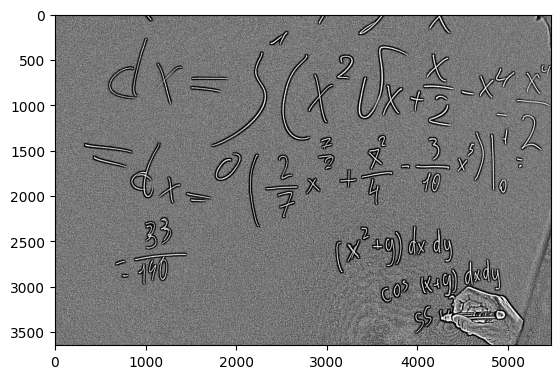

In [12]:
ret, thresh_1 = cv2.threshold(res, 120, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh_1)

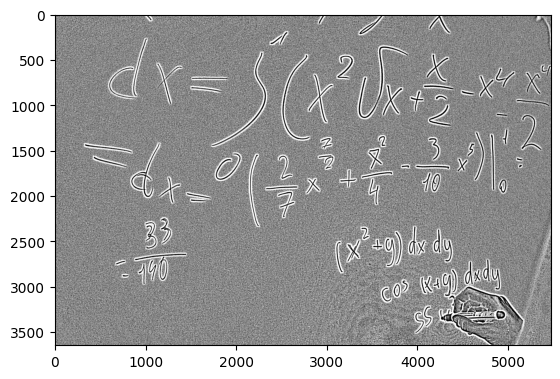

In [13]:
thresh_1 = (255-thresh_1)
cv2_imshow(thresh_1)

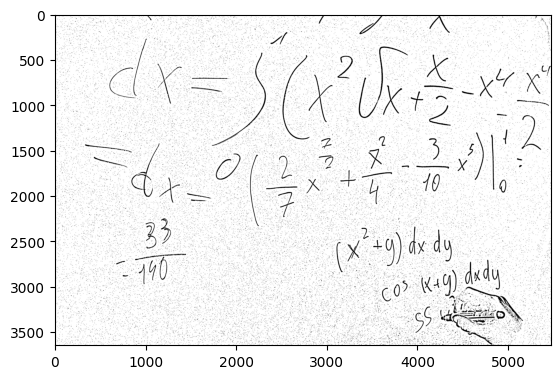

In [14]:
morph = cv2.morphologyEx(thresh_1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3)))
cv2_imshow(morph)

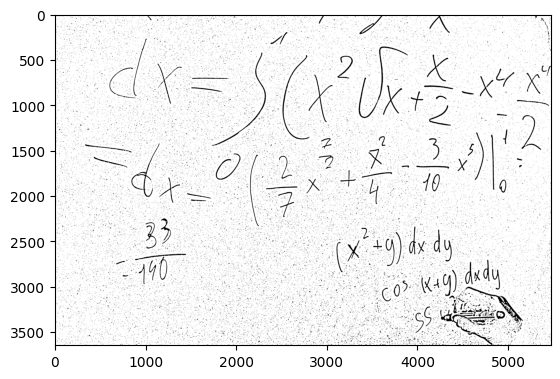

In [15]:
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT,(7, 7)))
cv2_imshow(morph)